In [ ]:
# Install necessary libraries
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 73.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=ca5c22305d664dc050863341d98e4490f4aa8560733fe59cd418c3f4002ac74e
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:

# Load datasets
df_charger = pd.read_csv("/content/1_ev_charger_dataset.csv")
df_charging_station = pd.read_excel("/content/2_ev_charging_station_dataset.xlsx")
df_market = pd.read_excel("/content/3_ev_market_india_dataset.xlsx")

In [ ]:
df_charger.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [ ]:
df_charging_station.head()

,"The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
1,1,Andaman & Nicobar Island,162,146945,147107
2,2,Arunachal Pradesh,20,252965,252985
3,3,Assam,64766,4677053,4741819
4,4,Bihar,83335,10407078,10490413


In [ ]:
df_market.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


<ipython-input-8-178e0cb387fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_charger['Region'], y=df_charger['Chargers'], palette='viridis')


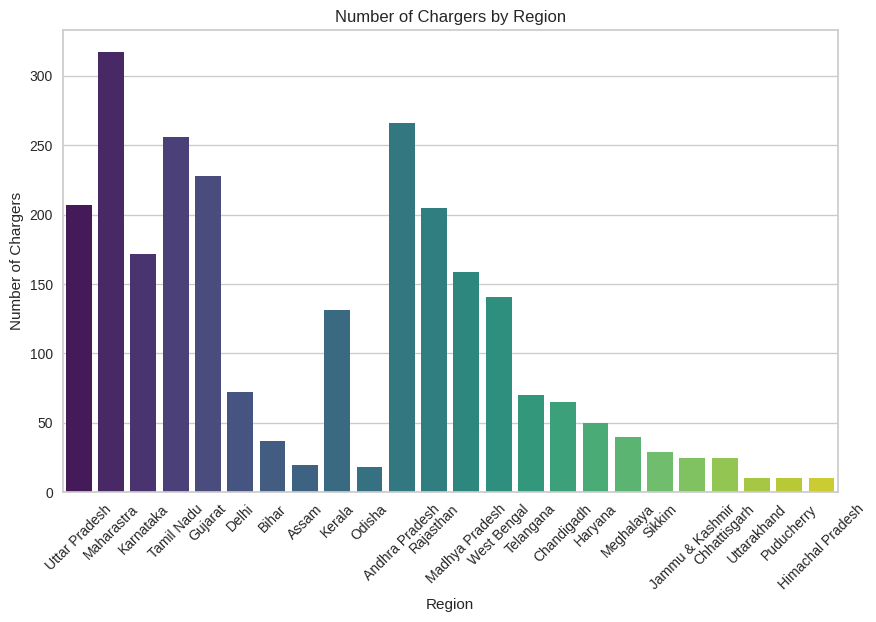

In [ ]:
# Plot number of chargers by region
plt.figure(figsize=(10, 6))
sns.barplot(x=df_charger['Region'], y=df_charger['Chargers'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Chargers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Chargers')
plt.show()

<ipython-input-17-fea835f9e3c7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State_Name', y='Total_Electric_Vehicle', data=df_charging_station, palette='viridis')


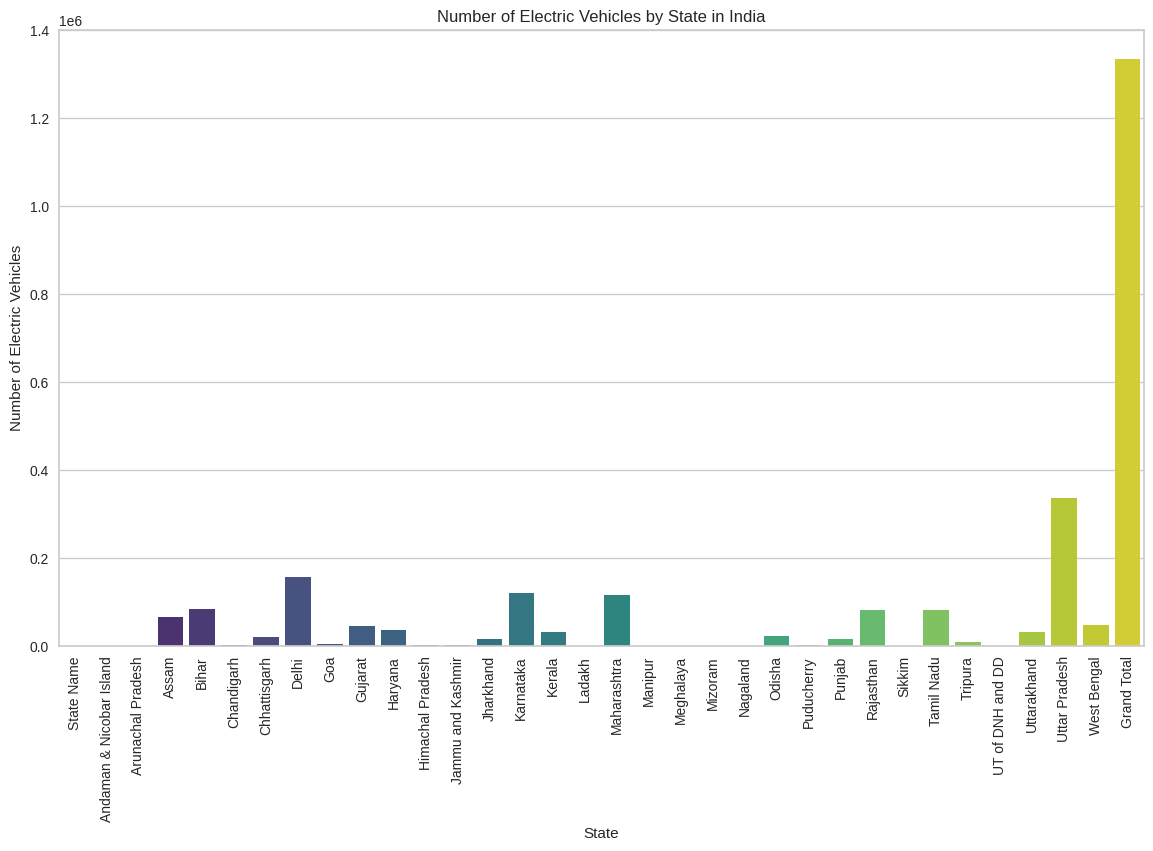

In [ ]:

# Rename columns for ease of use
df_charging_station.columns = ['Sr_No', 'State_Name', 'Total_Electric_Vehicle', 'Total_Non_Electric_Vehicle', 'Total']

# Drop irrelevant columns
df_charging_station = df_charging_station.drop(['Sr_No', 'Total_Non_Electric_Vehicle', 'Total'], axis=1)

# Convert 'Total_Electric_Vehicle' to numeric, handling any potential conversion issues
df_charging_station['Total_Electric_Vehicle'] = pd.to_numeric(df_charging_station['Total_Electric_Vehicle'], errors='coerce')

# Plot number of electric vehicles by state
plt.figure(figsize=(14, 8))
sns.barplot(x='State_Name', y='Total_Electric_Vehicle', data=df_charging_station, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Electric Vehicles by State in India')
plt.xlabel('State')
plt.ylabel('Number of Electric Vehicles')
plt.show()

<ipython-input-18-d238029b9f84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_market, x='Brand', palette='viridis')


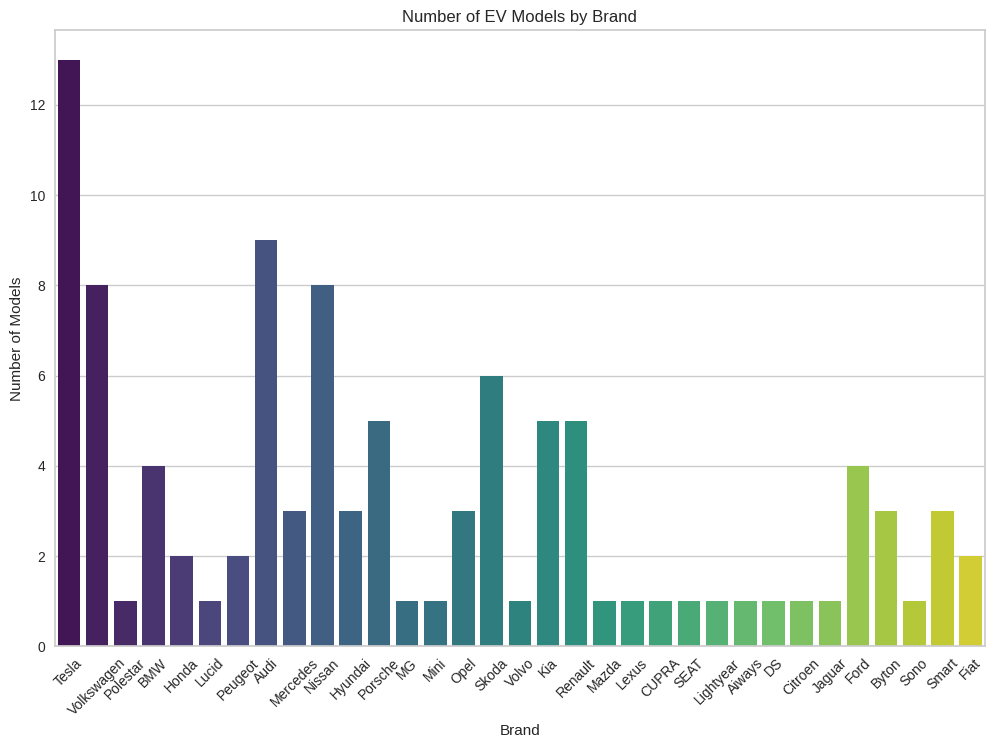

In [ ]:
# Plot EV market distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=df_market, x='Brand', palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of EV Models by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.show()

<ipython-input-19-f146e59e56df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_market, x='Segment', palette='viridis')


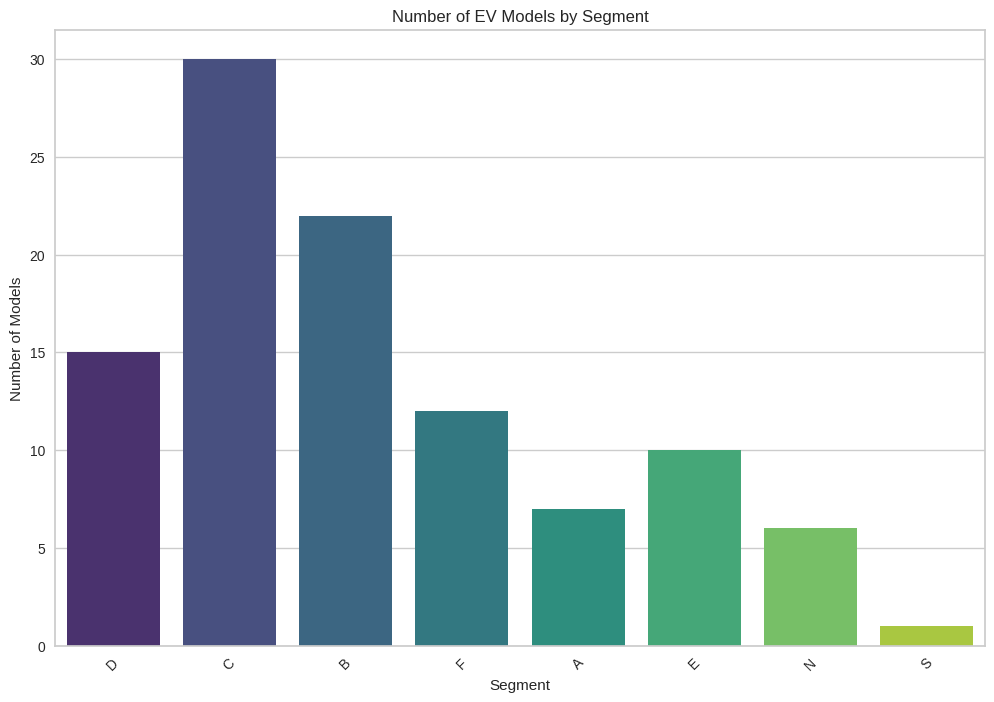

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_market, x='Segment', palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of EV Models by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Models')
plt.show()

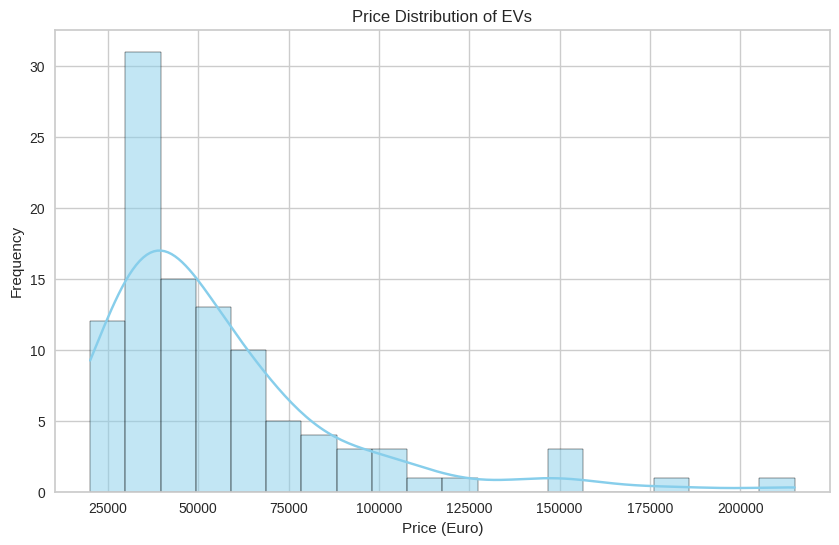

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_market['PriceEuro'], bins=20, color='skyblue', kde=True)
plt.title('Price Distribution of EVs')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.show()

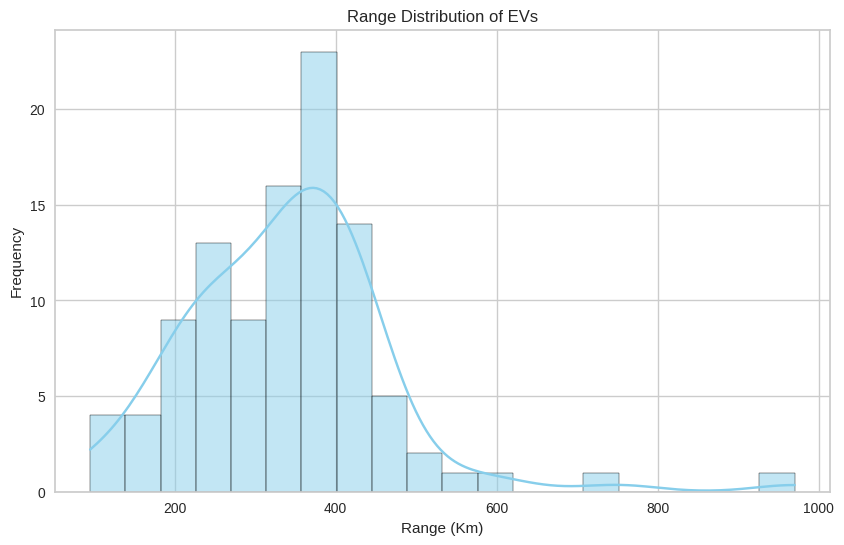

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_market['Range_Km'], bins=20, color='skyblue', kde=True)
plt.title('Range Distribution of EVs')
plt.xlabel('Range (Km)')
plt.ylabel('Frequency')
plt.show()

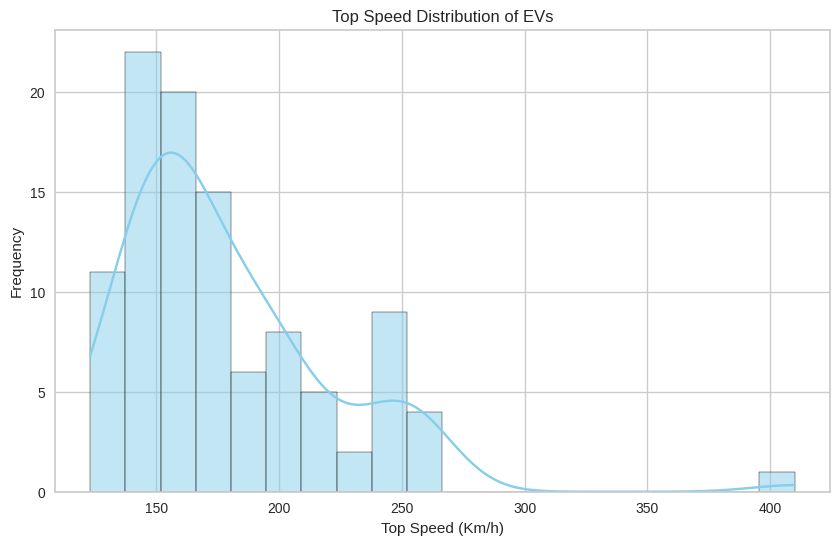

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_market['TopSpeed_KmH'], bins=20, color='skyblue', kde=True)
plt.title('Top Speed Distribution of EVs')
plt.xlabel('Top Speed (Km/h)')
plt.ylabel('Frequency')
plt.show()

## Exploratory data analysis

In [ ]:
# Exploratory Data Analysis (EDA) on EV Market Data
def perform_EDA(df, figure_size):
    categorical_columns = []
    continuous_columns = []

    from warnings import filterwarnings
    filterwarnings("ignore")

    num_plots = int((df.shape[1] + 1) / 2)
    plt.figure(figsize=figure_size)
    plot_position = 1

    for column in df.columns:
        if df[column].dtype == "object":
            categorical_columns.append(column)
            plt.subplot(num_plots, 2, plot_position)
            plot_position += 1
            sns.countplot(x=df[column])
        else:
            continuous_columns.append(column)
            plt.subplot(num_plots, 2, plot_position)
            plot_position += 1
            sns.histplot(df[column], kde=True)

    plt.show()

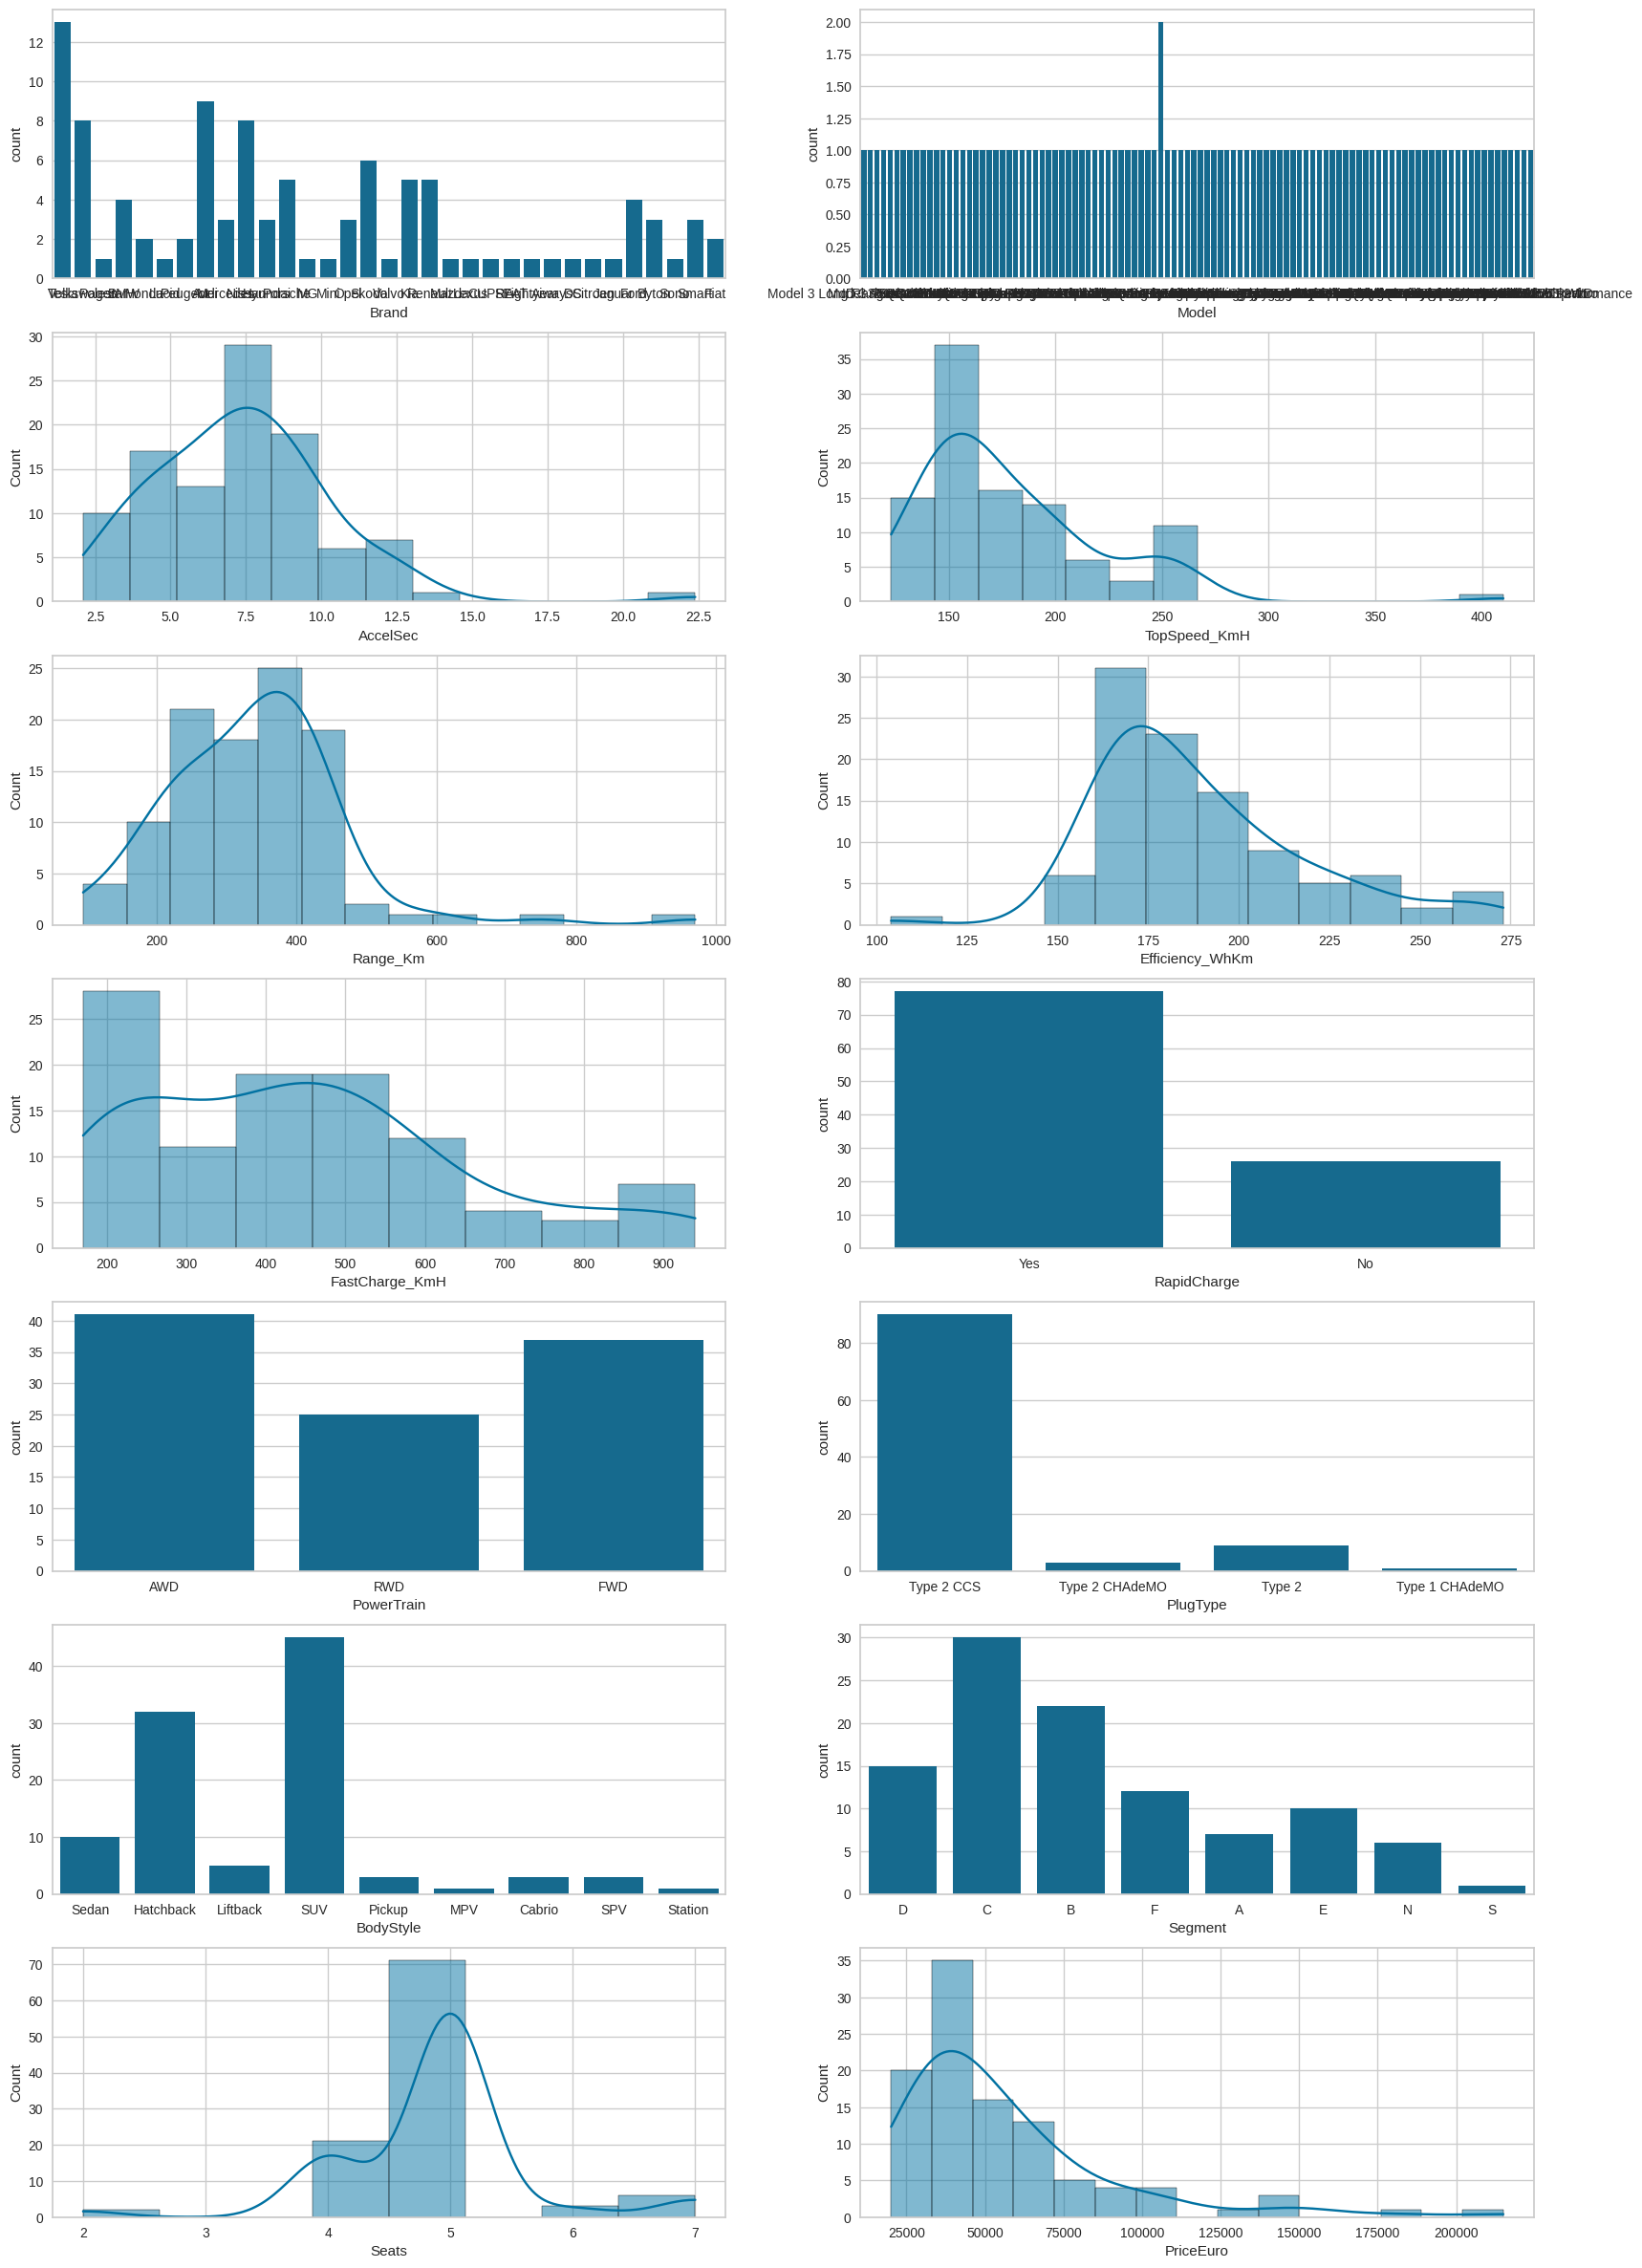

In [ ]:
perform_EDA(df_market, (20, 30))

In [ ]:
# Data Encoding
df_encoded = df_market.drop(['Brand', 'Model', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment'], axis=1)
df_encoded = df_encoded.apply(LabelEncoder().fit_transform)

## PCA

In [ ]:
# Applying scaling and PCA
pca_data = preprocessing.scale(df_encoded)
n_components = min(pca_data.shape[0], pca_data.shape[1])  # Choose number of components based on min(n_samples, n_features)
pca = PCA(n_components=n_components)
pc = pca.fit_transform(pca_data)
names = [f'pc{i+1}' for i in range(n_components)]
pf = pd.DataFrame(data=pc, columns=names)

In [ ]:

# PCA Components
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA Explained Variance Ratio: [0.59134044 0.12664845 0.12260036 0.07788998 0.03647532 0.02165868
 0.0148308  0.00855598]


## Correlation Matrix

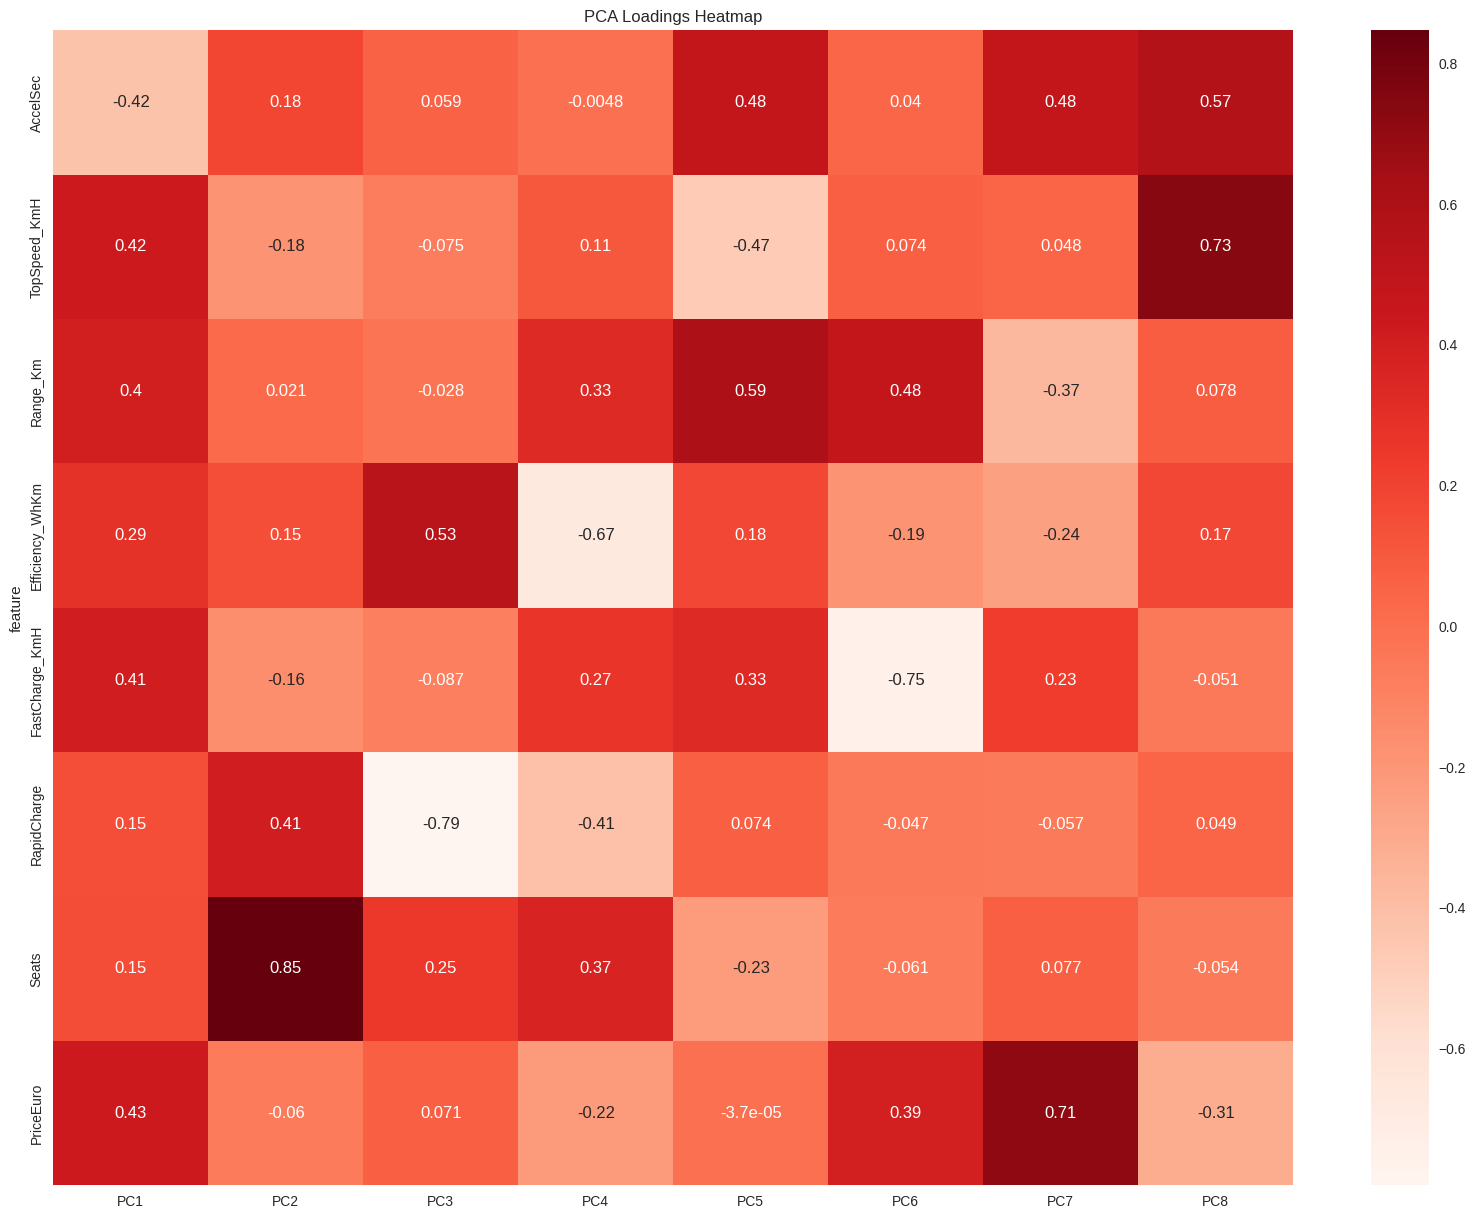

In [ ]:
# Correlation matrix plot for loadings
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
plt.figure(figsize=(20, 15))
sns.heatmap(loadings_df, annot=True, cmap='Reds')
plt.title('PCA Loadings Heatmap')
plt.show()

In [ ]:
# Get PCA scores
pca_scores = PCA().fit_transform(pca_data)

## 2D Biplot

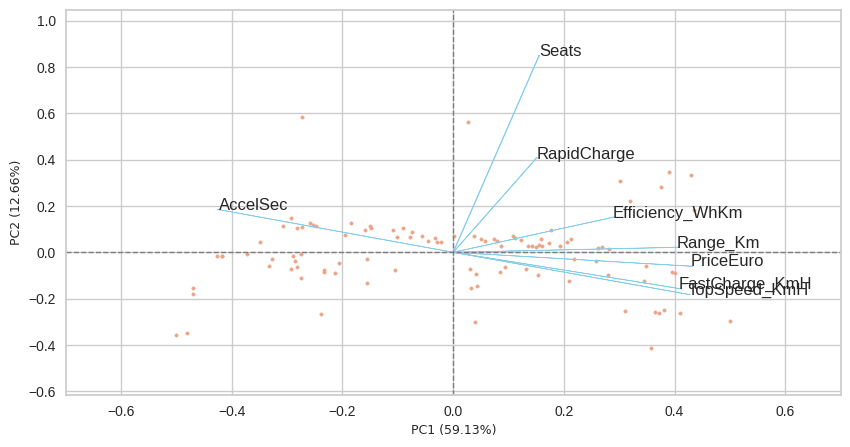

In [ ]:

# Get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df_encoded.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2), show=True, dim=(10, 5))

## Elbow point

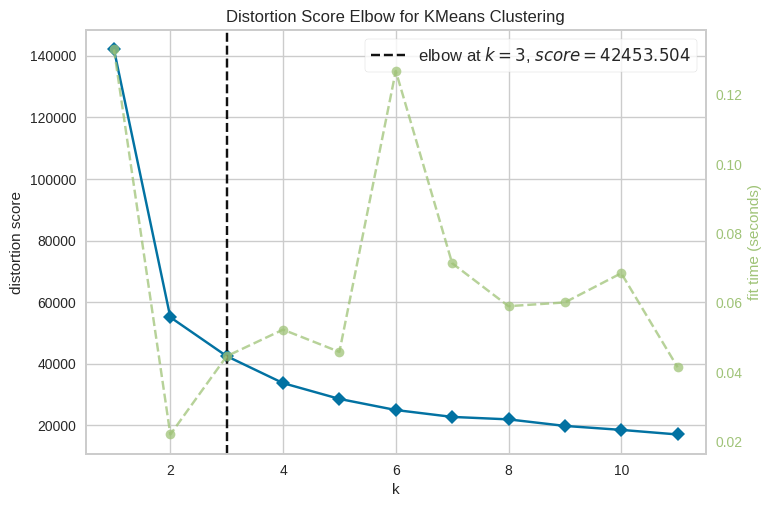

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# K-means clustering analysis
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12)).fit(df_encoded)
visualizer.show()

## K-means clustering

In [ ]:
# K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df_market['cluster_num'] = kmeans.labels_  # Adding to df
print('Labels:', kmeans.labels_)
print('WCSS:', kmeans.inertia_)
print('No. of iterations:', kmeans.n_iter_)
print('Cluster centroids:', kmeans.cluster_centers_)
print('Cluster size:', Counter(kmeans.labels_))

Labels: [2 1 2 0 1 2 1 1 3 0 0 1 3 2 1 3 2 1 1 1 1 2 1 2 2 3 3 0 3 1 0 3 1 2 1 3 3
 3 1 3 2 1 0 1 1 3 3 2 2 3 0 2 3 3 2 1 3 1 3 2 1 2 0 0 0 2 1 0 1 0 3 3 2 0
 1 1 0 1 0 2 3 2 1 3 0 1 0 0 0 3 0 1 3 0 3 3 1 0 3 0 0 0 0]
WCSS: 33691.2576923077
No. of iterations: 4
Cluster centroids: [[21.88461538 12.46153846 30.76923077 38.65384615 25.42307692  0.76923077
   2.15384615 58.42307692]
 [43.36666667  4.26666667  9.56666667 11.          5.36666667  0.56666667
   1.63333333 13.56666667]
 [ 8.45       19.2        39.9        25.25       39.25        0.95
   2.1        72.15      ]
 [31.59259259  9.07407407 25.         15.81481481 19.18518519  0.77777778
   1.81481481 36.18518519]]
Cluster size: Counter({1: 30, 3: 27, 0: 26, 2: 20})


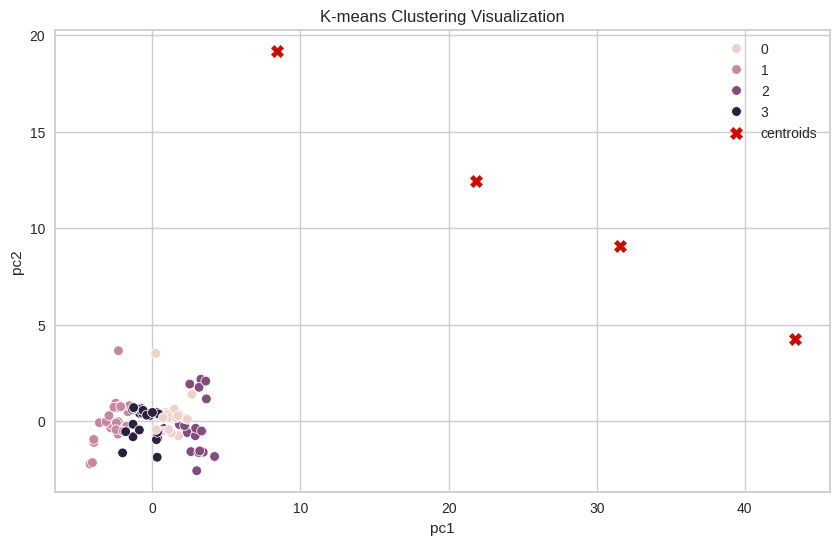

In [ ]:
# Cluster visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.title('K-means Clustering Visualization')
plt.show()

<Figure size 1000x600 with 0 Axes>

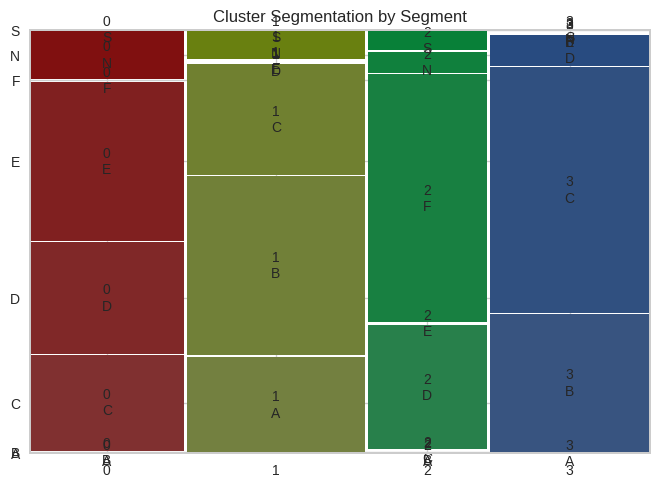

In [ ]:
# Crosstab creation and visualization
crosstab = pd.crosstab(df_market['cluster_num'], df_market['Segment'])
plt.figure(figsize=(10, 6))
mosaic(crosstab.stack())
plt.title('Cluster Segmentation by Segment')
plt.show()

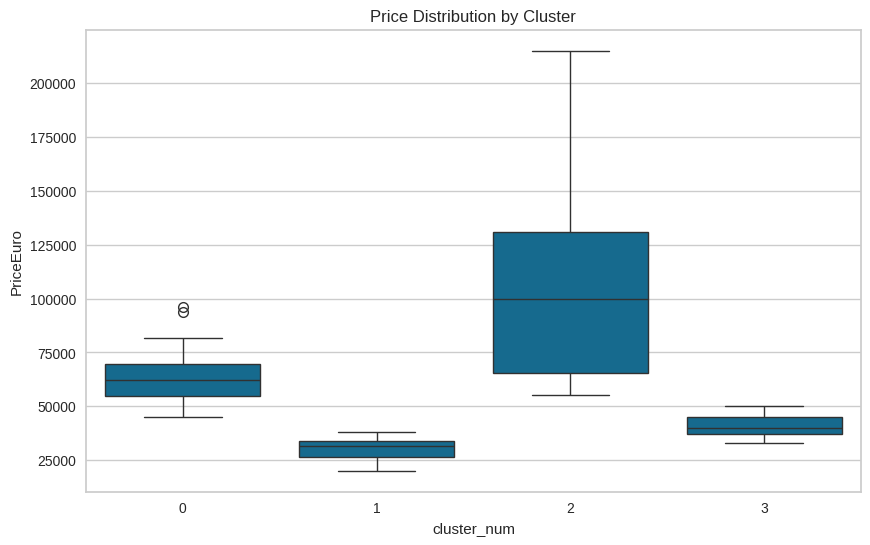

In [ ]:
# Box plot for 'PriceEuro'
plt.figure(figsize=(10, 6))
sns.boxplot(x="cluster_num", y="PriceEuro", data=df_market)
plt.title('Price Distribution by Cluster')
plt.show()

In [ ]:
# Calculating mean values
mean_values = df_market.groupby('cluster_num').agg({
    'PriceEuro': 'mean',
    'Range_Km': 'mean',
    'TopSpeed_KmH': 'mean'
}).reset_index()

print("Mean Values by Cluster:")
print(mean_values)

Mean Values by Cluster:
   cluster_num      PriceEuro    Range_Km  TopSpeed_KmH
0            0   64044.653846  374.230769    186.923077
1            1   30086.133333  212.500000    143.133333
2            2  104446.450000  487.500000    245.150000
3            3   40441.370370  334.814815    162.962963


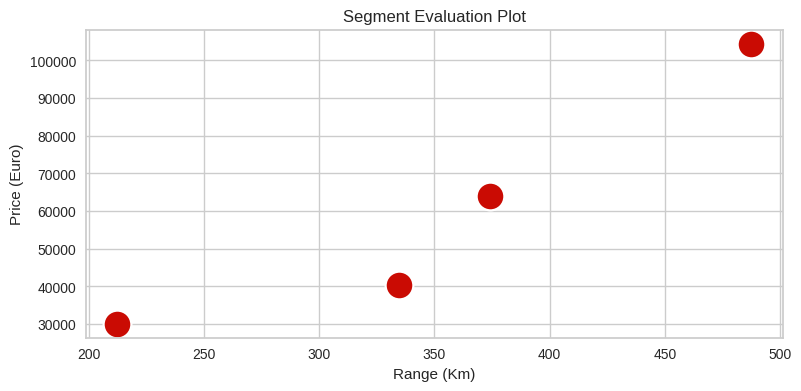

In [ ]:
# Targeting segments plot
plt.figure(figsize=(9, 4))
sns.scatterplot(x="Range_Km", y="PriceEuro", data=mean_values, s=400, color="r")
plt.title("Segment Evaluation Plot")
plt.xlabel("Range (Km)")
plt.ylabel("Price (Euro)")
plt.show()

# Psychographical Analysis on EV Customer Feedback

In [ ]:
df_ev_customer_feedback = pd.read_csv("EV_Customer_Feedback.csv")
df_cheap_electric = pd.read_csv("Cheapestelectriccars-EVDatabase.csv")
df_quick_electric = pd.read_csv("Quickestelectriccars-EVDatabase.csv")
df_ev_india = pd.read_csv("EVIndia.csv")

In [ ]:
df_ev_customer_feedback['rating'] = pd.to_numeric(df_ev_customer_feedback['rating'], errors='coerce')
df_ev_customer_feedback['Value for Money'] = pd.to_numeric(df_ev_customer_feedback['Value for Money'], errors='coerce')
df_ev_customer_feedback['Comfort'] = pd.to_numeric(df_ev_customer_feedback['Comfort'], errors='coerce')
df_ev_customer_feedback['Visual Appeal'] = pd.to_numeric(df_ev_customer_feedback['Visual Appeal'], errors='coerce')

<ipython-input-5-78bfd1743f6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ev_customer_feedback, x='rating', palette='viridis')


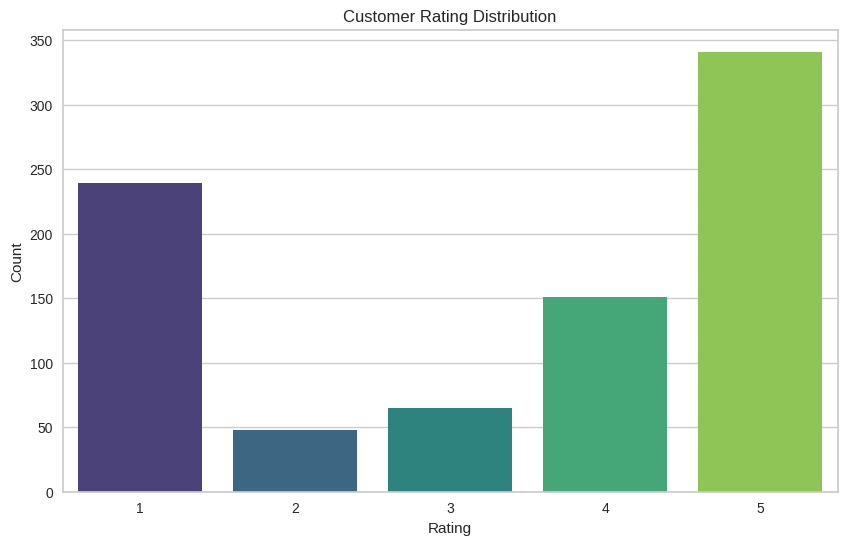

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ev_customer_feedback, x='rating', palette='viridis')
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-6-64038f7206af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ev_customer_feedback, x='Value for Money', palette='viridis')


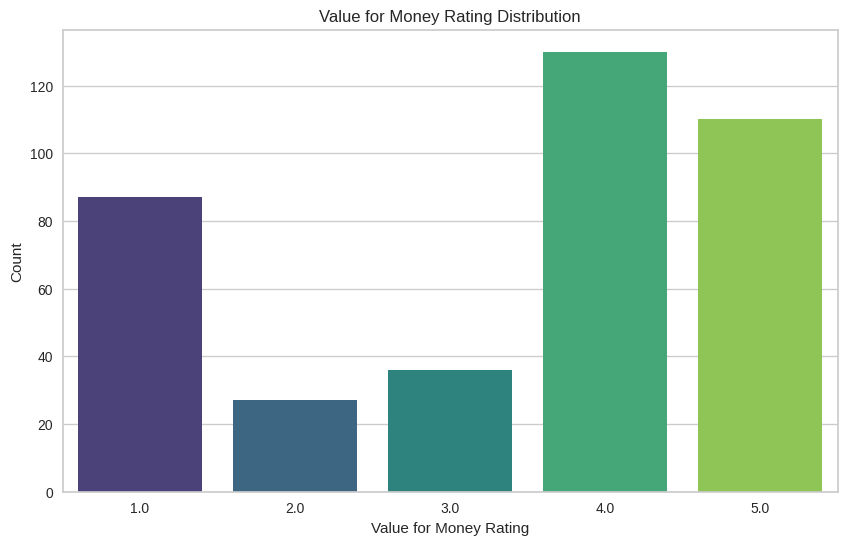

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ev_customer_feedback, x='Value for Money', palette='viridis')
plt.title('Value for Money Rating Distribution')
plt.xlabel('Value for Money Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-7-547067bb6de7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ev_customer_feedback, x='Comfort', palette='viridis')


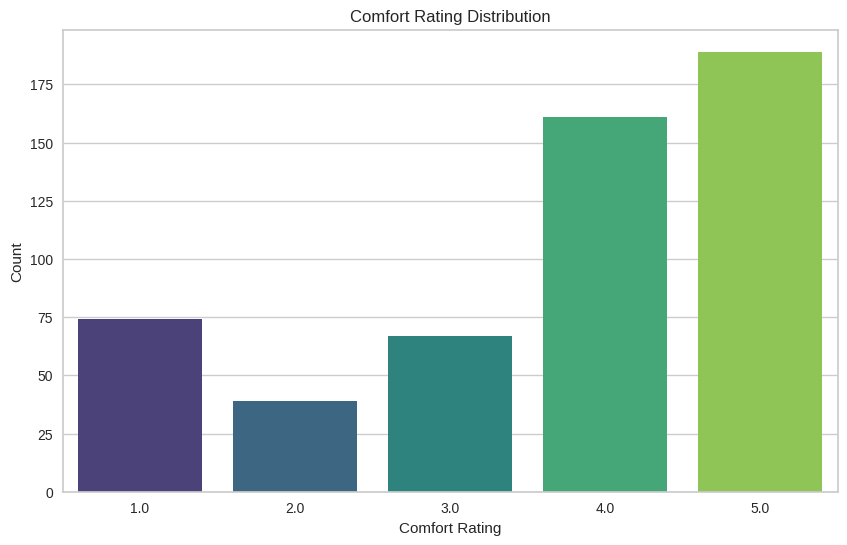

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ev_customer_feedback, x='Comfort', palette='viridis')
plt.title('Comfort Rating Distribution')
plt.xlabel('Comfort Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-8-6d2b8d17d967>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ev_customer_feedback, x='Visual Appeal', palette='viridis')


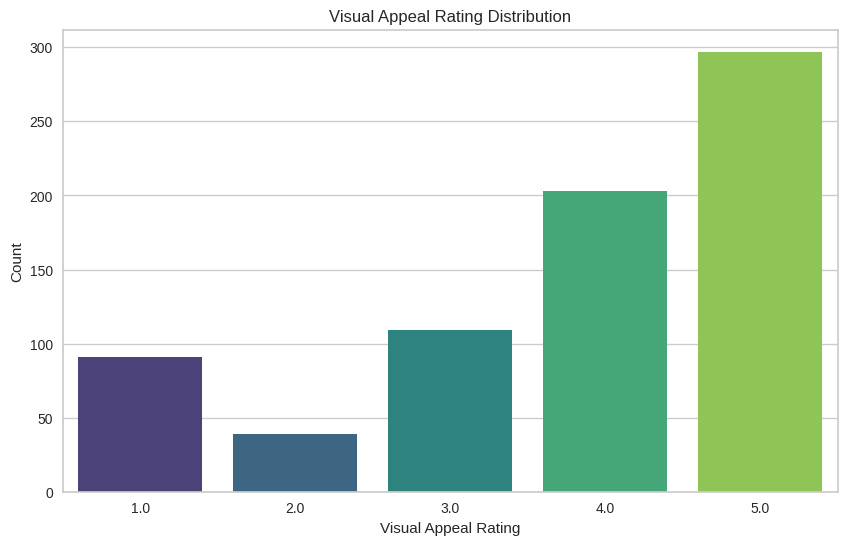

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ev_customer_feedback, x='Visual Appeal', palette='viridis')
plt.title('Visual Appeal Rating Distribution')
plt.xlabel('Visual Appeal Rating')
plt.ylabel('Count')
plt.show()

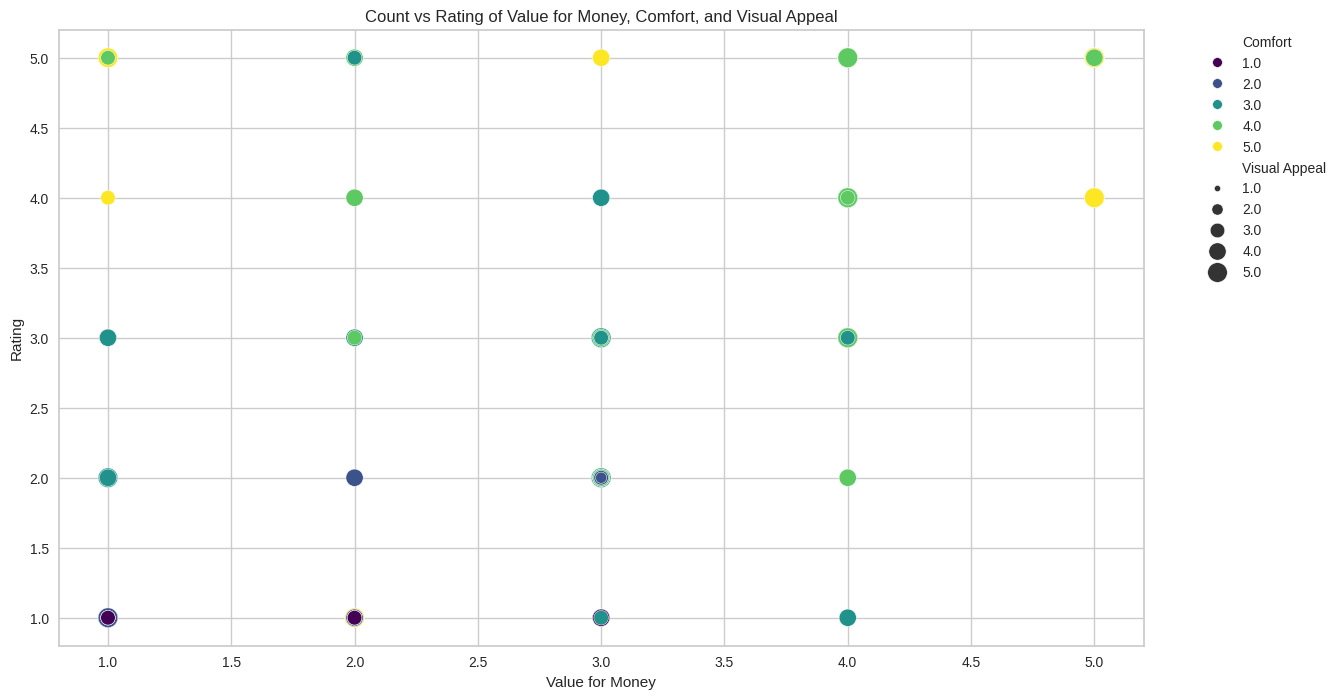

In [ ]:
# Scatter plot for count vs rating for value for money, comfort, visual appeal
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_ev_customer_feedback, x='Value for Money', y='rating', hue='Comfort', size='Visual Appeal', sizes=(20, 200), palette='viridis')
plt.title('Count vs Rating of Value for Money, Comfort, and Visual Appeal')
plt.xlabel('Value for Money')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
# Calculate the correlation matrix for the psychographic factors
correlation_matrix = df_ev_customer_feedback[['Value for Money', 'Visual Appeal', 'Comfort', 'rating']].corr()

# Display the correlation matrix with a gradient background
correlation_matrix.style.background_gradient(cmap='RdBu_r').format(precision=2)


,Value for Money,Visual Appeal,Comfort,rating
Value for Money,1.00,0.74,0.78,0.87
Visual Appeal,0.74,1.00,0.79,0.77
Comfort,0.78,0.79,1.00,0.83
rating,0.87,0.77,0.83,1.00


# Behavioral segmentation analysis

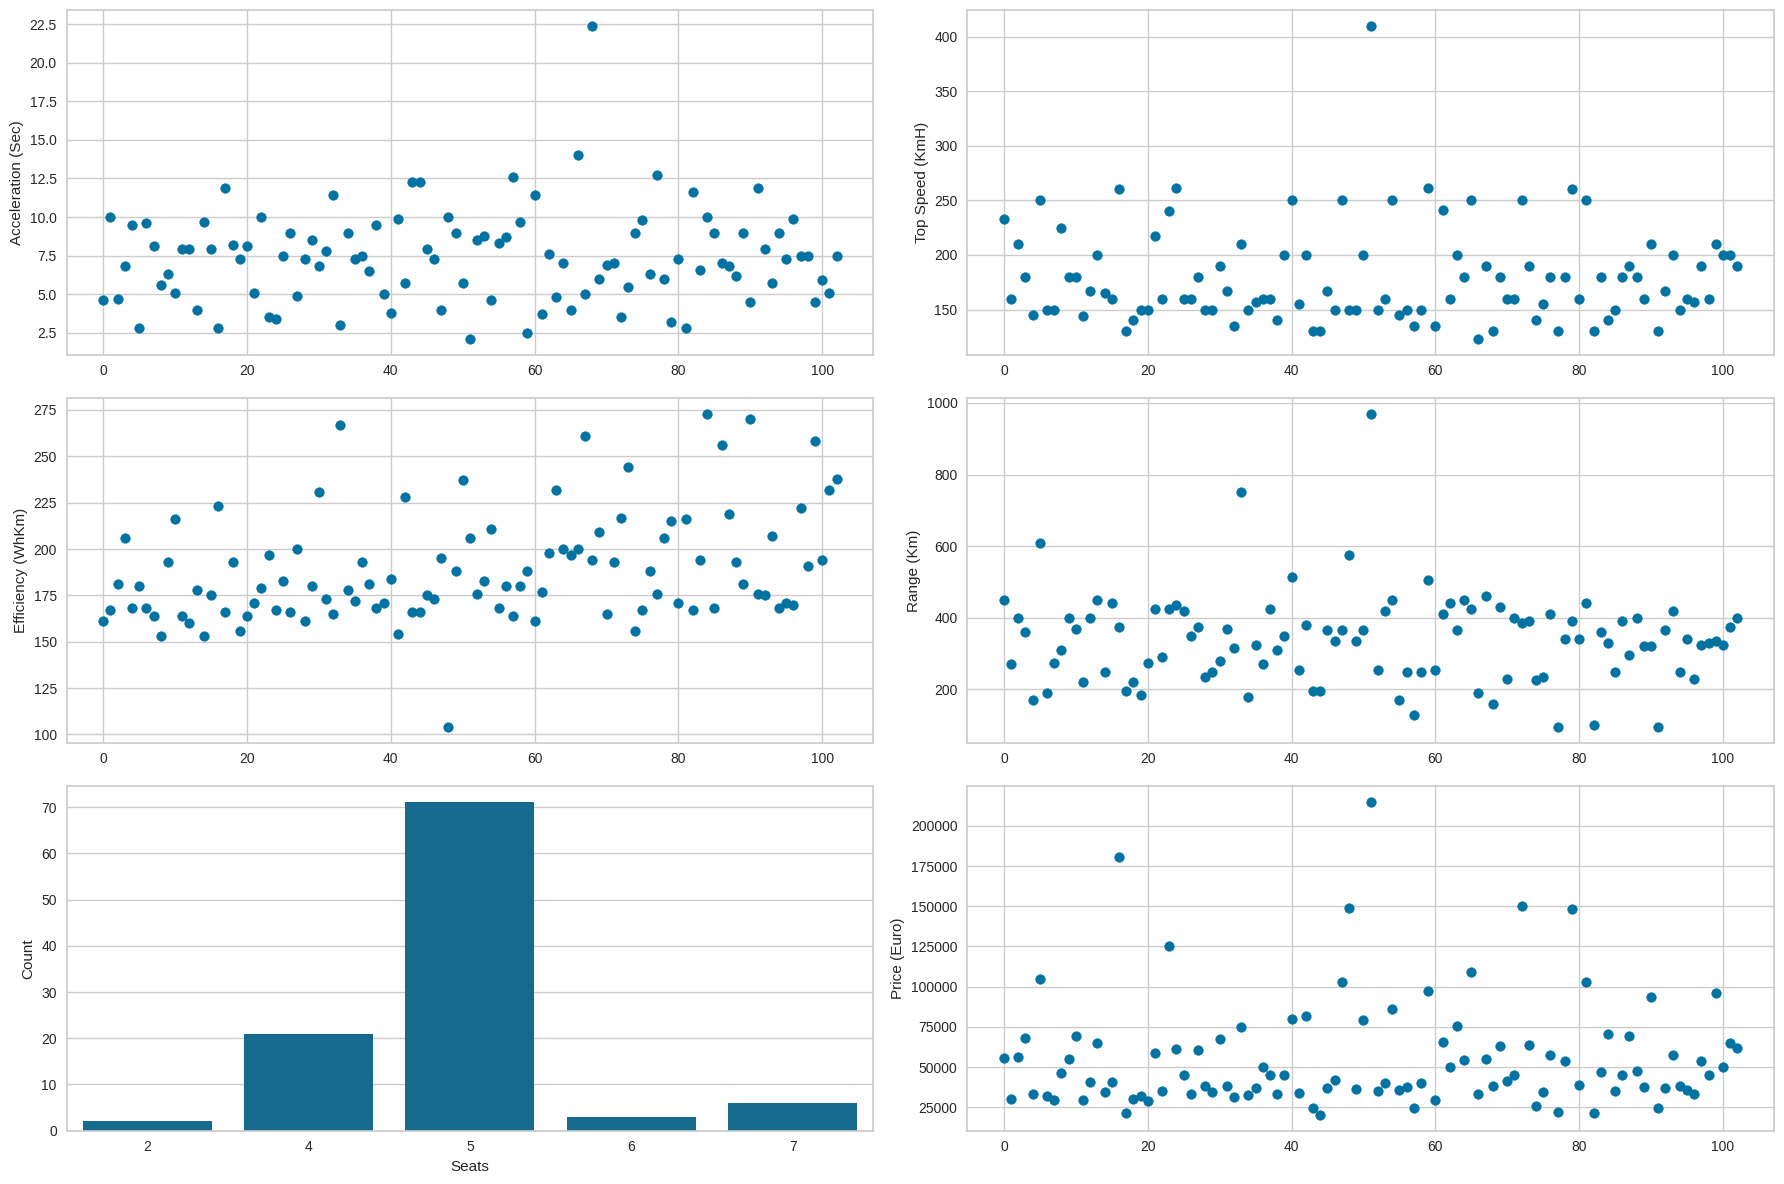

In [ ]:
plt.rcParams['figure.figsize'] = (18, 12)
LIST = [i for i in range(len(df_market))]

plt.subplot(321)
plt.scatter(LIST, df_market['AccelSec'])
plt.ylabel("Acceleration (Sec)")

plt.subplot(322)
plt.scatter(LIST, df_market['TopSpeed_KmH'])
plt.ylabel("Top Speed (KmH)")

plt.subplot(323)
plt.scatter(LIST, df_market['Efficiency_WhKm'])
plt.ylabel("Efficiency (WhKm)")

plt.subplot(324)
plt.scatter(LIST, df_market['Range_Km'])
plt.ylabel("Range (Km)")

plt.subplot(325)
sns.countplot(data=df_market, x='Seats')
plt.ylabel("Count")

plt.subplot(326)
plt.scatter(LIST, df_market['PriceEuro'])
plt.ylabel("Price (Euro)")

plt.tight_layout()
plt.show()

# Sales vs. States plot for geographical analysis

In [ ]:
# Simulate sales data for each state
df_sales = pd.DataFrame({
    'State_Name': df_charging_station['State_Name'],
    'Sales': np.random.randint(100, 1000, df_charging_station.shape[0])
})

# Merge sales data with charging station data
df_sales_charging = pd.merge(df_charging_station, df_sales, on='State_Name')

<ipython-input-21-bf3132324720>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sales_charging['State_Name'], y=df_sales_charging['Sales'], palette='viridis')


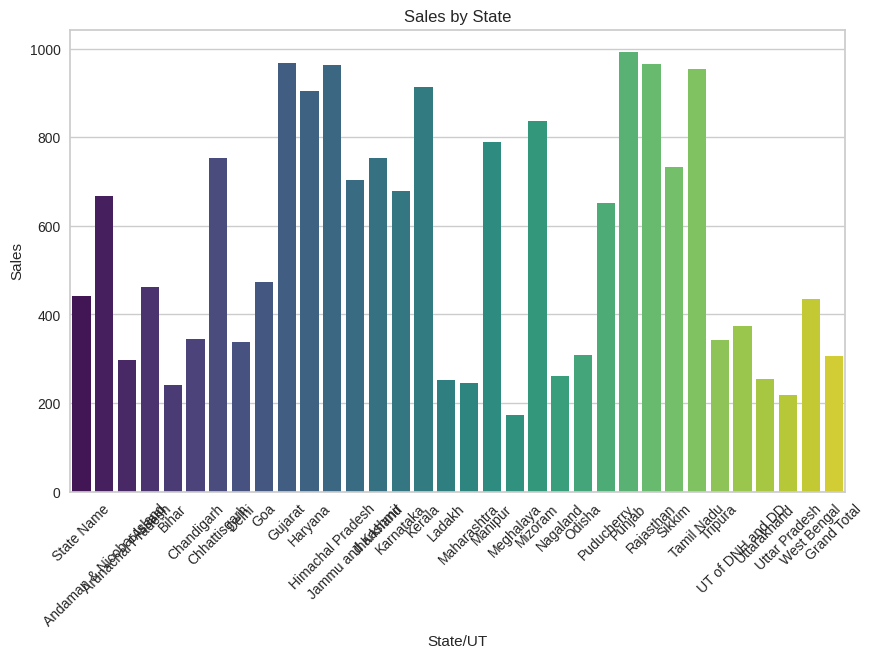

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_sales_charging['State_Name'], y=df_sales_charging['Sales'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Sales by State')
plt.xlabel('State/UT')
plt.ylabel('Sales')
plt.show()